In [12]:
from scprint.tasks import GRNfer

from scprint import scPrint
from scdataloader import Preprocessor

from bengrn import get_sroy_gt
from grnndata import utils

%load_ext autoreload
%autoreload 2

import torch
torch.set_float32_matmul_precision('medium')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

  %reload_ext autoreload


In [2]:
model = scPrint.load_from_checkpoint('../../data/temp/pk2sldhk/epoch=6-step=35000.ckpt', precpt_gene_emb = '../../data/temp/embeddings.parquet')

In [27]:
preadata = get_sroy_gt(join="inner")

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:197: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


In [4]:
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True, do_postp=False, min_valid_genes_id=5000)

In [5]:
adata.obs['organism_ontology_term_id'] = "NCBITaxon:9606"
adata = preprocessor(adata.copy())

Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess

Removed 0 genes.
Seeing 97 outliers (21.23% of total dataset):


In [119]:
preadata.obs

,dataset
CL100078088_L01_501,liu
CL100078088_L01_502,liu
CL100078088_L01_503,liu
CL100078088_L01_507,liu
CL100078088_L01_510,liu
...,...
TGTAATCATCTG,chen
GTTCTTCCTAGT,chen
ATCCGTTCAACG,chen
AAGCCTGGGGGC,chen


In [68]:
adata.X = adata.X / 10

In [6]:
inferer = GRNfer(model, adata, num_genes=4000)#(adata.X.sum(0)>0).sum())

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 7586


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 457 × 256
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'conv_pred_cell_type_ontology_term_id', 'conv_pred_disease_ontology_term_id', 'conv_pred_assay_ontology_term_id', 'conv_pred_self_reported_ethnicity_ontology_term_id', 'leiden'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in panda

couldn't log to tensorboard
couldn't log to wandb
avg link count: 338.83879093198993
Top central genes: [('ENSG00000187522', 0.03398209471735397), ('ENSG00000185722', 0.03315860610154594), ('ENSG00000115761', 0.032445456145955225), ('ENSG00000144233', 0.032282411027072605), ('ENSG00000134899', 0.0316702331356978), ('ENSG00000108094', 0.03152658678751667), ('ENSG00000166479', 0.03122242964306504), ('ENSG00000183576', 0.031198677525641753), ('ENSG00000077235', 0.030996577887937513), ('ENSG00000166889', 0.030991572547799662), ('ENSG00000147099', 0.030888388720869256), ('ENSG00000151148', 0.030698216896620382), ('ENSG00000132356', 0.030697911511594515), ('ENSG00000173409', 0.03065335852776026), ('ENSG00000129933', 0.0306444098647097), ('ENSG00000143919', 0.030629830735307447), ('ENSG00000172262', 0.030611259729038127), ('ENSG00000105705', 0.03033542441213865), ('ENSG00000075188', 0.030286657402684155), ('ENSG00000089022', 0.030159075881271747), ('ENSG00000100401', 0.030071323059103223), ('

GRnnData object with n_obs × n_vars = 457 × 3970
    obs: 'dataset', 'organism_ontology_term_id', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'uid', 'symbol', 'ncbi_gene_ids', 'biotype', 'description', 'synonyms', 'organism_id', 'public_source_id', 'created_by_id', 'mt', 'ribo', 'hb', 'organism', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'centrality', 'TFs'
    uns: 'unseen_genes', 'hvg'
    layers: 'clean'
    varp: 'GRN'
    with a grn of 1345190 elements

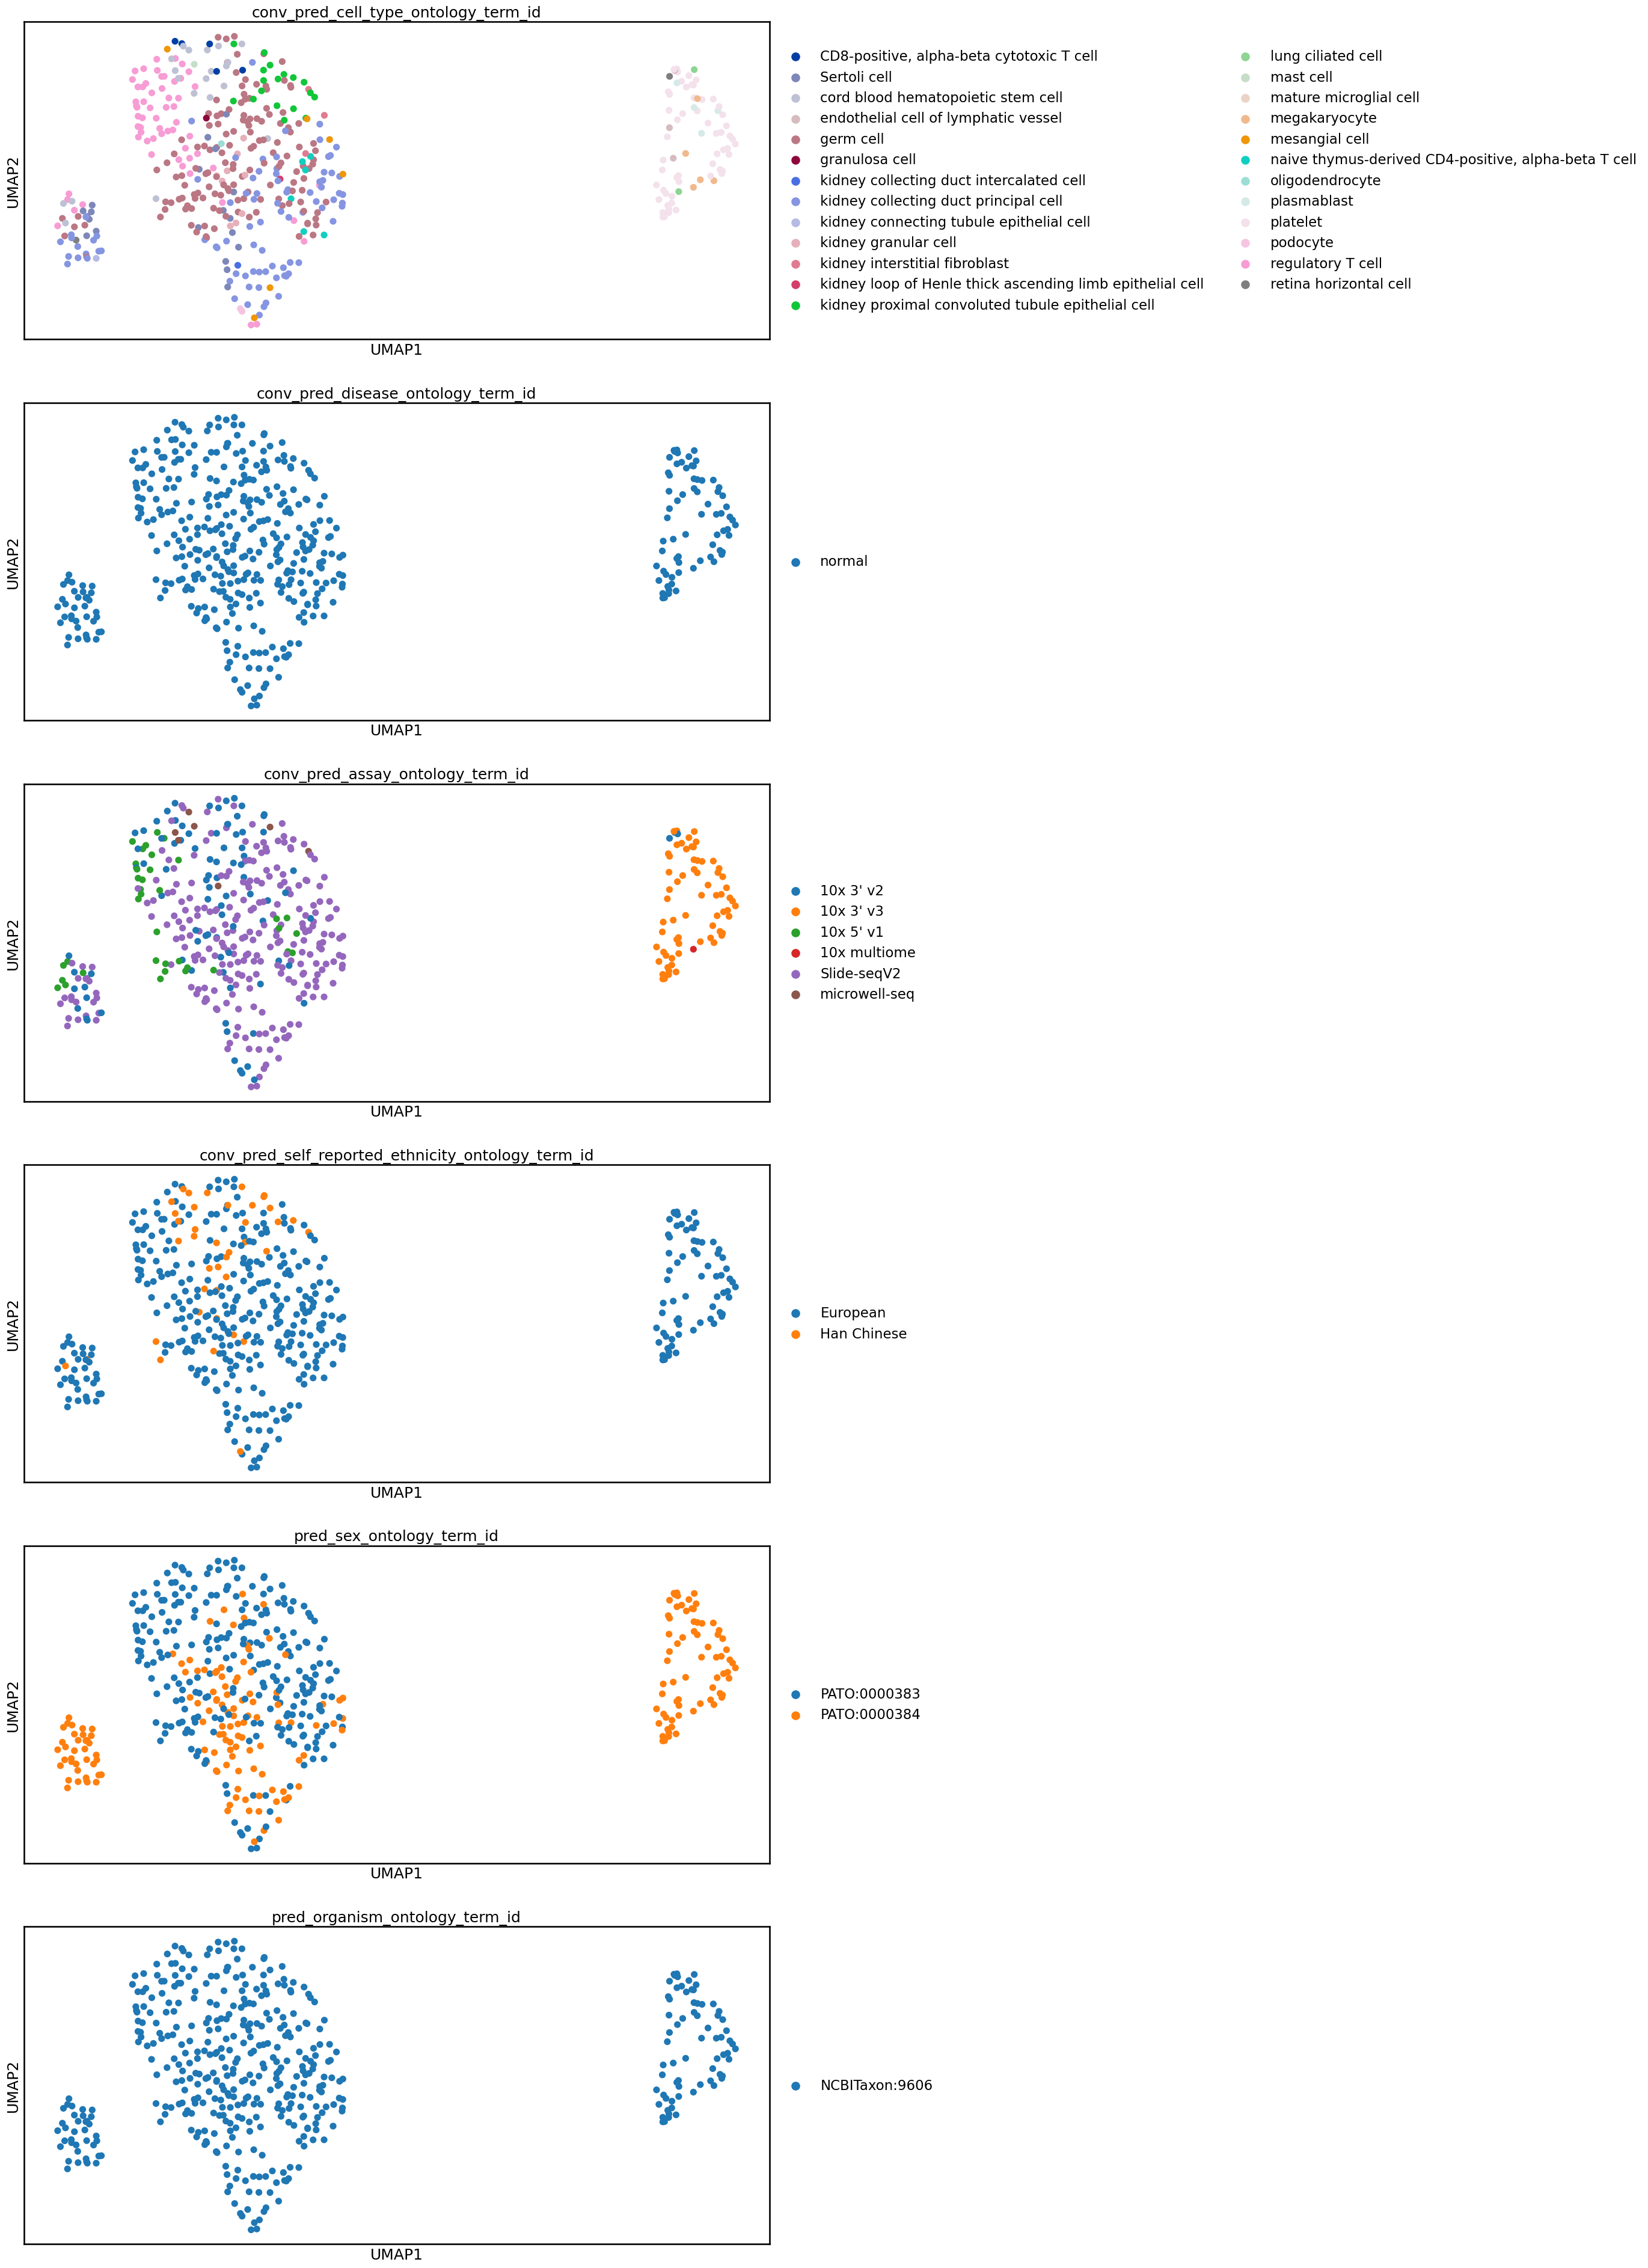

In [7]:
grn = inferer(layers=[4])

In [ ]:
# predicts germ cells & epithelial cells for these hESCs.
# when I put a count of *10, gives only epithelial cells...

In [9]:
grn

GRnnData object with n_obs × n_vars = 457 × 3970
    obs: 'dataset', 'organism_ontology_term_id', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'uid', 'symbol', 'ncbi_gene_ids', 'biotype', 'description', 'synonyms', 'organism_id', 'public_source_id', 'created_by_id', 'mt', 'ribo', 'hb', 'organism', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'centrality', 'TFs'
    uns: 'unseen_genes', 'hvg'
    layers: 'clean'
    varp: 'GRN'
    with a grn of 1345190 elements

## looking at more impact of TFs

In [10]:
from scipy import stats

# Calculate the sum of non-zero elements for TFs and non-TFs
TFs_sum = (grn.varp['GRN'][grn.var['TFs']]!=0).sum(1)
non_TFs_sum = (grn.varp['GRN'][~grn.var['TFs']]!=0).sum(1)

# Perform a statistical test to check if they come from the same distribution
ks_result = stats.ks_2samp(TFs_sum, non_TFs_sum)

# Compute fold increase and perform a statistical test
fold_increase = TFs_sum.mean() / non_TFs_sum.mean()
fold_increase_test = stats.ttest_ind(TFs_sum, non_TFs_sum)

ks_result, fold_increase, fold_increase_test

(KstestResult(statistic=0.04861427469064066, pvalue=0.5932791281827753, statistic_location=139, statistic_sign=-1),
 1.0069513240387664,
 TtestResult(statistic=0.2135975568555281, pvalue=0.8308718786266501, df=3968.0))

## enrichment

In [ ]:
res = utils.enrichment(grn, of='Central')

In [ ]:
# no results for the central genes

2024-03-10 17:18:16,333 [WARNING] Duplicated values found in preranked stats: 91.59% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-10 17:18:16,336 [INFO] Parsing data files for GSEA.............................
2024-03-10 17:18:16,338 [INFO] Enrichr library gene sets already downloaded in: /home/ml4ig1/.cache/gseapy, use local file
2024-03-10 17:18:16,348 [INFO] Enrichr library gene sets already downloaded in: /home/ml4ig1/.cache/gseapy, use local file
2024-03-10 17:18:16,857 [INFO] Enrichr library gene sets already downloaded in: /home/ml4ig1/.cache/gseapy, use local file
2024-03-10 17:18:16,905 [INFO] Enrichr library gene sets already downloaded in: /home/ml4ig1/.cache/gseapy, use local file
2024-03-10 17:18:16,908 [INFO] Enrichr library gene sets already downloaded in: /home/ml4ig1/.cache/gseapy, use local file
2024-03-10 17:18:16,919 [INFO] Enrichr library gene sets already downloaded in: /home/ml4ig1/.cache/gseapy, use local fil

['WikiPathways_2016__Cytoplasmic Ribosomal Proteins Homo sapiens WP477', 'GO_Cellular_Component_2015__extracellular region (GO:0005576)', 'GO_Cellular_Component_2015__extracellular vesicular exosome (GO:0070062)', 'KEGG_2016__Ribosome Homo sapiens hsa03010', 'GO_Cellular_Component_2015__cytosolic large ribosomal subunit (GO:0022625)', 'GO_Cellular_Component_2015__extracellular space (GO:0005615)', 'WikiPathways_2016__Cytoplasmic Ribosomal Proteins Mus musculus WP163', 'PPI_Hub_Proteins__GABARAPL1', 'GO_Cellular_Component_2015__large ribosomal subunit (GO:0015934)', 'GO_Molecular_Function_2015__structural constituent of ribosome (GO:0003735)', 'GO_Cellular_Component_2015__cell-substrate junction (GO:0030055)', 'GO_Cellular_Component_2015__adherens junction (GO:0005912)', 'GO_Cellular_Component_2015__anchoring junction (GO:0070161)', 'GO_Cellular_Component_2015__focal adhesion (GO:0005925)', 'GO_Cellular_Component_2015__cell-substrate adherens junction (GO:0005924)', 'GO_Cellular_Compone

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,WikiPathways_2016__Cytoplasmic Ribosomal Prote...,0.496296,3.904243,0.0,0.0,0.0,34/49,21.74%,RPL23;RPL31;RPL9;RPS21;RPS13;RPL35;RPS20;RPL41...
1,GO_Cellular_Component_2015__extracellular regi...,0.314846,3.721038,0.0,0.0,0.0,78/121,35.39%,APELA;A2M;APOC1;GSN;MFAP2;PAMR1;SPINK5;LAMA4;A...
2,GO_Cellular_Component_2015__extracellular vesi...,0.154434,3.707511,0.0,0.0,0.0,325/674,36.70%,CTSH;RPL23;RPL31;DSC2;HLA-DRA;GPRC5C;ARL6IP5;A...
3,KEGG_2016__Ribosome Homo sapiens hsa03010,0.383428,3.667978,0.0,0.0,0.0,47/73,28.09%,RPL23;RPL31;RPL9;RPS21;RPS13;RPL35;RPS20;RPL36...
4,GO_Cellular_Component_2015__cytosolic large ri...,0.589729,3.656159,0.0,0.0,0.0,23/29,21.74%,RPL23;RPL31;RPL9;RPL35;RPL41;RPL7;RPL24;RPL37;...
...,...,...,...,...,...,...,...,...,...
203,GO_Molecular_Function_2015__L-amino acid trans...,0.442254,1.906213,0.009276,0.087827,0.999,13/13,55.92%,SLC7A5;SLC38A1;SLC1A3;CTNS;SLC43A1;SLC7A2;SLC1...
204,KEGG_2016__Amoebiasis Homo sapiens hsa05146,0.405228,1.893883,0.010619,0.093972,0.999,13/16,41.99%,LAMA4;ACTN4;HSPB1;COL4A5;SERPINB6;PIK3R1;PLCB1...
205,PPI_Hub_Proteins__CBL,0.232052,1.887996,0.006656,0.096565,1.0,36/51,48.97%,JAK1;FYN;UBE2L3;SPRY4;EEF1A1;KIT;KRT18;SH3GL2;...
206,PPI_Hub_Proteins__LYN,0.250382,1.887221,0.013699,0.096427,1.0,33/44,51.36%,UBB;PLAUR;FYN;KIT;SERPINE1;PTPN6;STOML2;LYN;HN...


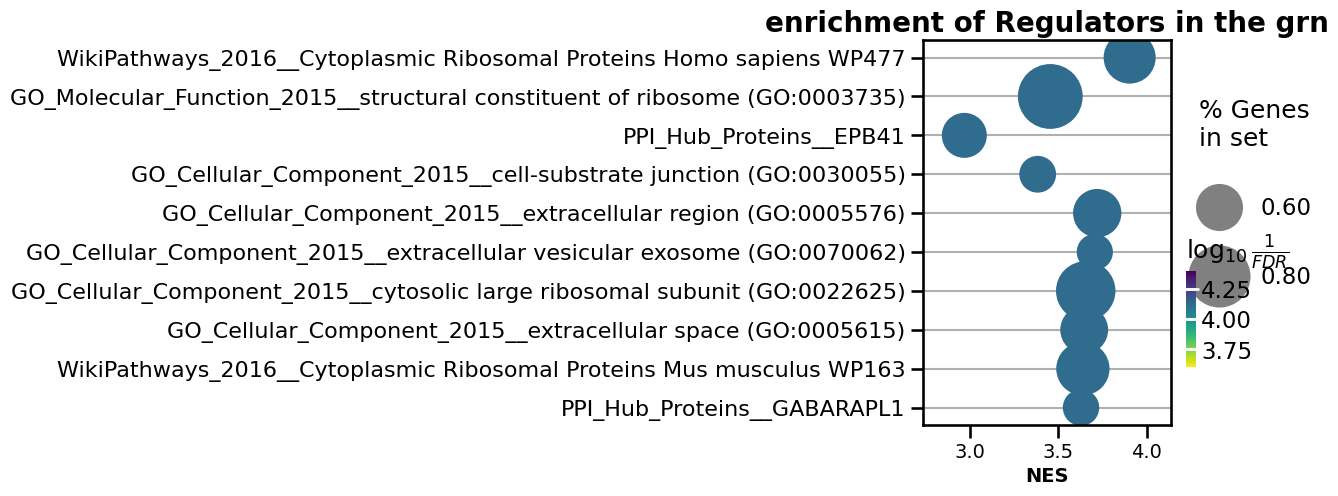

In [14]:
res = utils.enrichment(grn, of='Regulators')

In [22]:
res.head(60)

,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,WikiPathways_2016__Cytoplasmic Ribosomal Prote...,0.496296,3.904243,0.0,0.0,0.0,34/49,21.74%,RPL23;RPL31;RPL9;RPS21;RPS13;RPL35;RPS20;RPL41...
1,GO_Cellular_Component_2015__extracellular regi...,0.314846,3.721038,0.0,0.0,0.0,78/121,35.39%,APELA;A2M;APOC1;GSN;MFAP2;PAMR1;SPINK5;LAMA4;A...
2,GO_Cellular_Component_2015__extracellular vesi...,0.154434,3.707511,0.0,0.0,0.0,325/674,36.70%,CTSH;RPL23;RPL31;DSC2;HLA-DRA;GPRC5C;ARL6IP5;A...
3,KEGG_2016__Ribosome Homo sapiens hsa03010,0.383428,3.667978,0.0,0.0,0.0,47/73,28.09%,RPL23;RPL31;RPL9;RPS21;RPS13;RPL35;RPS20;RPL36...
4,GO_Cellular_Component_2015__cytosolic large ri...,0.589729,3.656159,0.0,0.0,0.0,23/29,21.74%,RPL23;RPL31;RPL9;RPL35;RPL41;RPL7;RPL24;RPL37;...
5,GO_Cellular_Component_2015__extracellular spac...,0.303076,3.647534,0.0,0.0,0.0,83/130,35.89%,CTSH;GSN;SH3BGRL;CRLF1;ACTN4;PPIA;HSPB1;STOM;K...
6,WikiPathways_2016__Cytoplasmic Ribosomal Prote...,0.512611,3.640113,0.0,0.0,0.0,27/38,21.66%,RPL31;RPL9;RPS21;RPS13;RPL35;RPS20;RPS3;RPL7;R...
7,PPI_Hub_Proteins__GABARAPL1,0.257239,3.629553,0.0,0.0,0.0,84/173,25.59%,RPL31;DSC2;XRCC6;GSN;RPL9;SRSF3;YWHAE;RPS13;RP...
8,GO_Cellular_Component_2015__large ribosomal su...,0.470066,3.558807,0.0,0.0,0.0,32/42,30.98%,RPL23;RPL31;RPL9;RPL35;RPL41;RPL7;RPL24;MRPL41...
9,GO_Molecular_Function_2015__structural constit...,0.34218,3.455956,0.0,0.0,0.0,70/81,53.65%,RPL23;RPL31;RPL9;RPS21;RPS13;RPL35;RPS20;RPL36...


In [ ]:
# queries in the attn matrix
res = utils.enrichment(grn, of='Targets')

In [ ]:
# no results for targets

In [73]:
withdata = preadata[:,(preadata.varp['GRN'].sum(1)>0)]

In [39]:
grn_onloc = grn[:,grn.var.index.isin(withdata.var_names)]

In [93]:
withdata = withdata[:,(withdata.var.index.isin(grn_onloc.var.index))]

In [ ]:
withdata = withdata[:,grn_onloc.var_names]

In [156]:
utils.similarity(grn_onloc.copy(), withdata.copy())

/home/ml4ig1/Documents code/GRnnData/grnndata/utils.py:294: DeprecationWarning: invalid escape sequence '\m'
  """


intra_similarity_self 0.023164749718486626
intra_similarity_other -0.03404298924300149
inter_similarity 1.0
similar_edges_ct 1
precision 0.06666666666666667
recall 0.038461538461538464
accuracy 0.025
spearman_corr SignificanceResult(statistic=nan, pvalue=nan)
rand precision 0.13333333333333333
rand recall 0.07692307692307693
rand accuracy 0.05128205128205128


{'spearman_corr': SignificanceResult(statistic=nan, pvalue=nan),
 'precision': 0.06666666666666667,
 'precision_rand': 0.13333333333333333,
 'recall': 0.038461538461538464,
 'recall_rand': 0.07692307692307693,
 'accuracy': 0.025,
 'accuracy_rand': 0.05128205128205128,
 'sim_expr': 1.0,
 'intra_similarity_self': 0.023164749718486626,
 'intra_similarity_other': -0.03404298924300149}

In [ ]:
benchmark = ben.BenGRN(grn)

In [ ]:
benchmark.do_tests()